In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Understand the dataset

In [132]:
# Read in the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)


In [133]:
# Identify the shape of the dataset
print(df.shape)

(364558, 53)


In [134]:
df.dropna(how='all', axis=1, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [136]:
# Identify variables with null values
print(df.isnull().sum())

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [137]:
# Seperating numerical and categorical data
df_obj = df.select_dtypes(include=[object])
df_num = df.select_dtypes(exclude=[object])

In [138]:
# percentage of missing values in numerical and categorical data

percent_num_nul = (df_num.isnull().sum()/
                         df_num.isnull().count()).sort_values(ascending=False)
percent_catg_nul = (df_obj.isnull().sum()/
                         df_obj.isnull().count()).sort_values(ascending=False)

print(percent_num_nul[percent_num_nul>0])
print('-'*30)
print(percent_catg_nul[percent_catg_nul>0])

X Coordinate (State Plane)    0.011054
Y Coordinate (State Plane)    0.011054
Latitude                      0.011054
Longitude                     0.011054
Incident Zip                  0.008224
dtype: float64
------------------------------
Ferry Direction                   0.999997
Ferry Terminal Name               0.999995
Road Ramp                         0.999281
Bridge Highway Segment            0.999281
Bridge Highway Name               0.999185
Bridge Highway Direction          0.999185
Landmark                          0.998971
Intersection Street 2             0.861443
Intersection Street 1             0.859775
Cross Street 2                    0.158562
Cross Street 1                    0.156869
Incident Address                  0.141813
Street Name                       0.141813
Descriptor                        0.017833
Location                          0.011054
Address Type                      0.008920
City                              0.008221
Resolution Action Updated Da

In [139]:
# I drop the columns with more than 80% missing value
indx = percent_catg_nul[percent_catg_nul>0.8].index
df.drop(indx , axis=1, inplace=True)

# 2. Perform basic data exploratory analysis

In [140]:
# Utilize missing value treatment in numerical data
cols = df_num.columns
df[cols] = df_num.fillna(df_num.mean())


In [141]:
df[cols].isna().any()

Unique Key                    False
Incident Zip                  False
X Coordinate (State Plane)    False
Y Coordinate (State Plane)    False
Latitude                      False
Longitude                     False
dtype: bool

In [142]:
# Analyze the date column and remove the entries if it has an incorrect timeline
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Due Date'] = pd.to_datetime(df['Due Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'], format='%m/%d/%Y %I:%M:%S %p')
#
# df = df[(df['Created Date'] >= '2010-01-01') & (df['Created Date'] <= '2022-12-31')]


In [143]:
##### Filling up the missing date with interpolation between a cell before and after

In [144]:
df['Resolution Action Updated Date'].isna().sum()

2402

In [145]:
col = ['Created Date', 'Closed Date','Due Date','Resolution Action Updated Date']
df.dropna(subset=col, axis=0,inplace=True)

In [146]:
# categorical_data.fillna(categorical_data.mode().iloc[0],inplace=True)
df_obj.fillna(df_obj.mode().iloc[0],inplace=True)

In [147]:
df[df_obj.columns]=df_obj

display(df.isna().any())

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Address Type                      False
City                              False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)        False
Y Coordinate (State Plane)        False
Park Facility Name                False


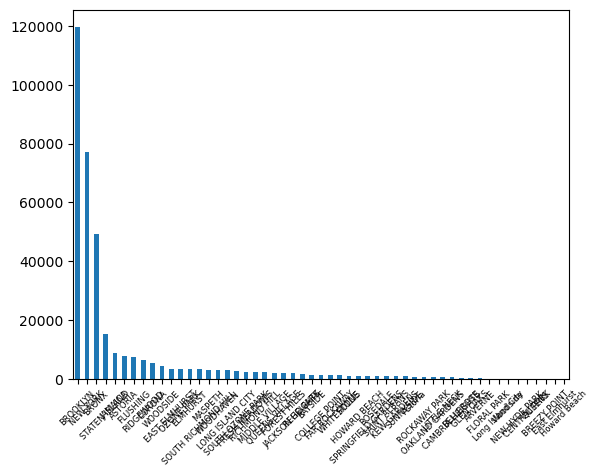

<Figure size 1200x1000 with 0 Axes>

In [148]:
# Draw a frequency plot for city-wise complaints
df['City'].value_counts().plot(kind='bar')

plt.xticks(rotation=45)
plt.xticks(fontsize=6)
plt.figure(figsize=(12, 10))
plt.show()

In [149]:
df[df['City']=='BROOKLYN'].groupby(['City','Complaint Type']).size().sort_values(ascending=False)

City      Complaint Type           
BROOKLYN  Blocked Driveway             36530
          Illegal Parking              33840
          Noise - Street/Sidewalk      14081
          Noise - Commercial           13934
          Derelict Vehicle              6320
          Noise - Vehicle               5974
          Animal Abuse                  3192
          Noise - Park                  1581
          Traffic                       1260
          Homeless Encampment            948
          Vending                        575
          Noise - House of Worship       389
          Drinking                       294
          Urinating in Public            155
          Bike/Roller/Skate Chronic      126
          Disorderly Youth                79
          Illegal Fireworks               61
          Graffiti                        60
          Posting Advertisement           58
          Panhandling                     50
          Agency Issues                    8
dtype: int64

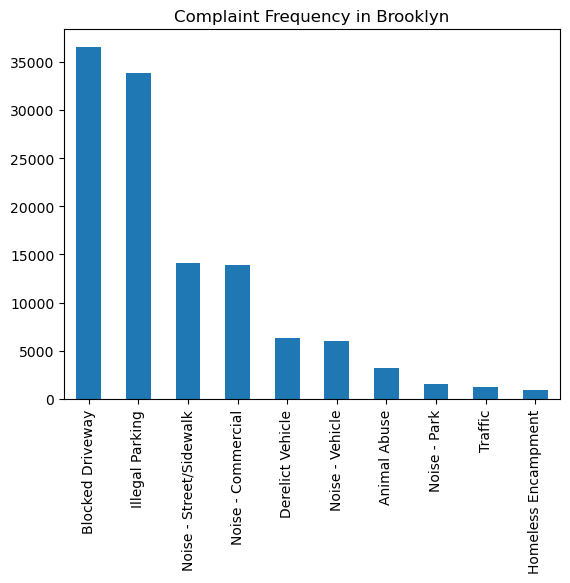

In [150]:
df_brooklyn = df.loc[df['City'] == 'BROOKLYN']
df_brooklyn['Complaint Type'].value_counts().head(10).plot(kind='bar', title = 'Complaint Frequency in Brooklyn');

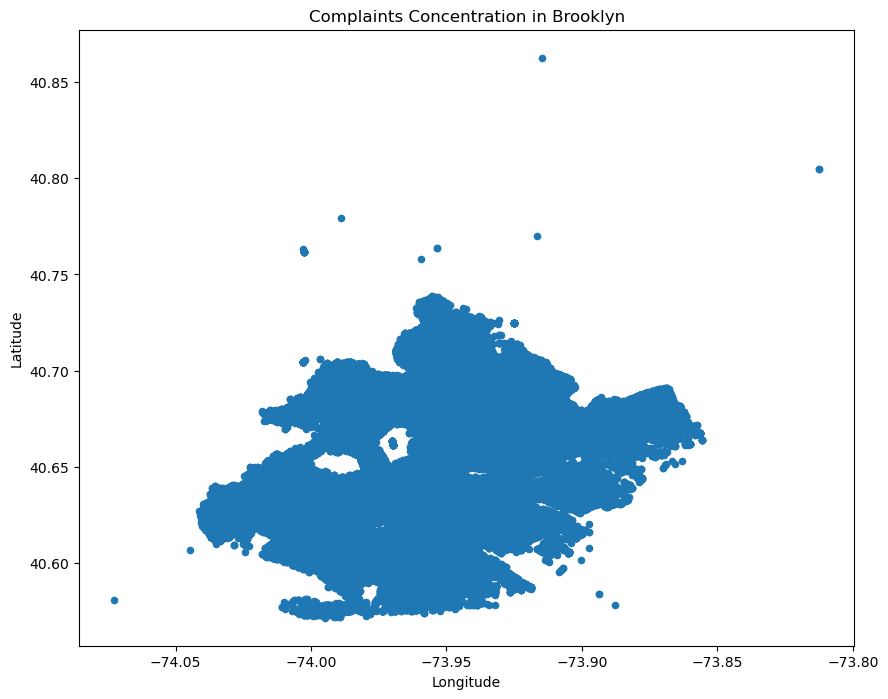

In [151]:
# Draw scatter plot for complaint concentration across Brooklyn
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', 
                                       x='Longitude', y='Latitude', 
                                       title = 'Complaints Concentration in Brooklyn', 
                                       figsize = (10, 8));

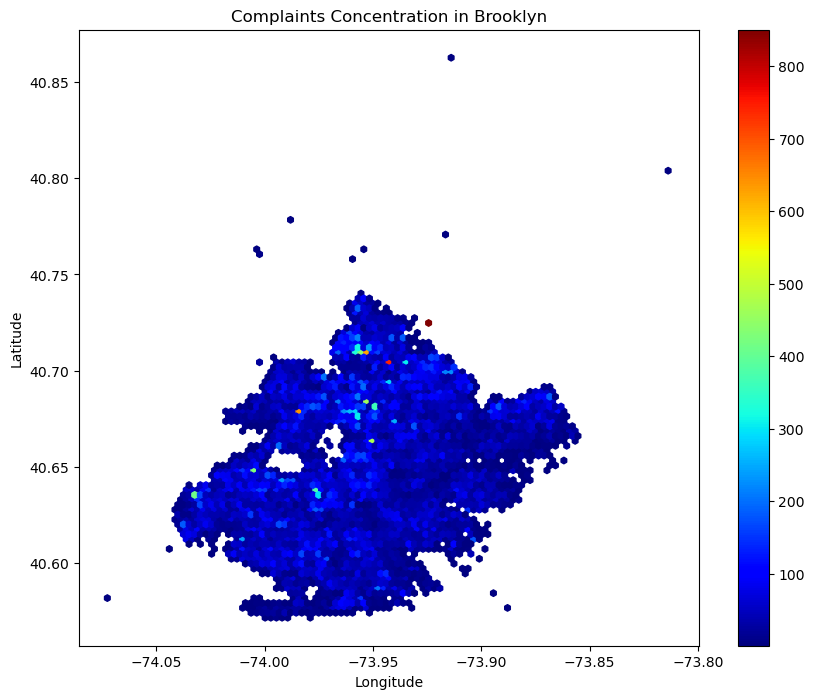

In [152]:
df_brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', 
                                       x='Longitude', y='Latitude',
                                        colormap = 'jet',mincnt=1,
                                       title = 'Complaints Concentration in Brooklyn', 
                                       figsize = (10, 8));

# 3. Find major types of complaints

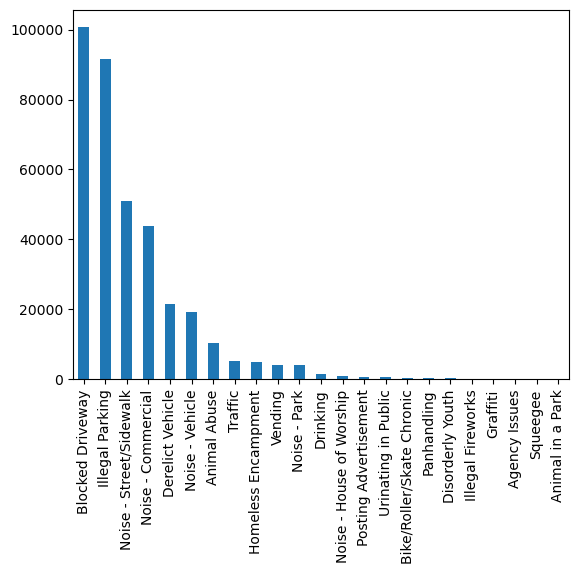

In [153]:
# Plot a bar graph of count vs. complaint types
df['Complaint Type'].value_counts().plot(kind='bar')
plt.show()

In [154]:

# Find the top 10 types of complaints
top_10_complaints = df['Complaint Type'].value_counts(ascending=False).head(10)
print(top_10_complaints)

Blocked Driveway           100618
Illegal Parking             91705
Noise - Street/Sidewalk     51131
Noise - Commercial          43749
Derelict Vehicle            21516
Noise - Vehicle             19300
Animal Abuse                10530
Traffic                      5193
Homeless Encampment          4877
Vending                      4183
Name: Complaint Type, dtype: int64


In [155]:
# Display the types of complaints in each city in a separate dataset
complaints_by_city = df.groupby(['City', 'Complaint Type']).size().sort_values(ascending=False)
complaints_by_city

City            Complaint Type           
BROOKLYN        Blocked Driveway             36530
                Illegal Parking              33840
NEW YORK        Noise - Street/Sidewalk      22243
                Noise - Commercial           18686
BRONX           Blocked Driveway             17061
                                             ...  
BELLEROSE       Homeless Encampment              1
                Illegal Fireworks                1
                Noise - House of Worship         1
OZONE PARK      Bike/Roller/Skate Chronic        1
QUEENS VILLAGE  Graffiti                         1
Length: 778, dtype: int64

In [156]:
complaints_by_city = complaints_by_city.reset_index(name='count')
complaints_by_city

,City,Complaint Type,count
0,BROOKLYN,Blocked Driveway,36530
1,BROOKLYN,Illegal Parking,33840
2,NEW YORK,Noise - Street/Sidewalk,22243
3,NEW YORK,Noise - Commercial,18686
4,BRONX,Blocked Driveway,17061
...,...,...,...
773,BELLEROSE,Homeless Encampment,1
774,BELLEROSE,Illegal Fireworks,1
775,BELLEROSE,Noise - House of Worship,1
776,OZONE PARK,Bike/Roller/Skate Chronic,1


# 4. Visualize the major types of complaints in each city

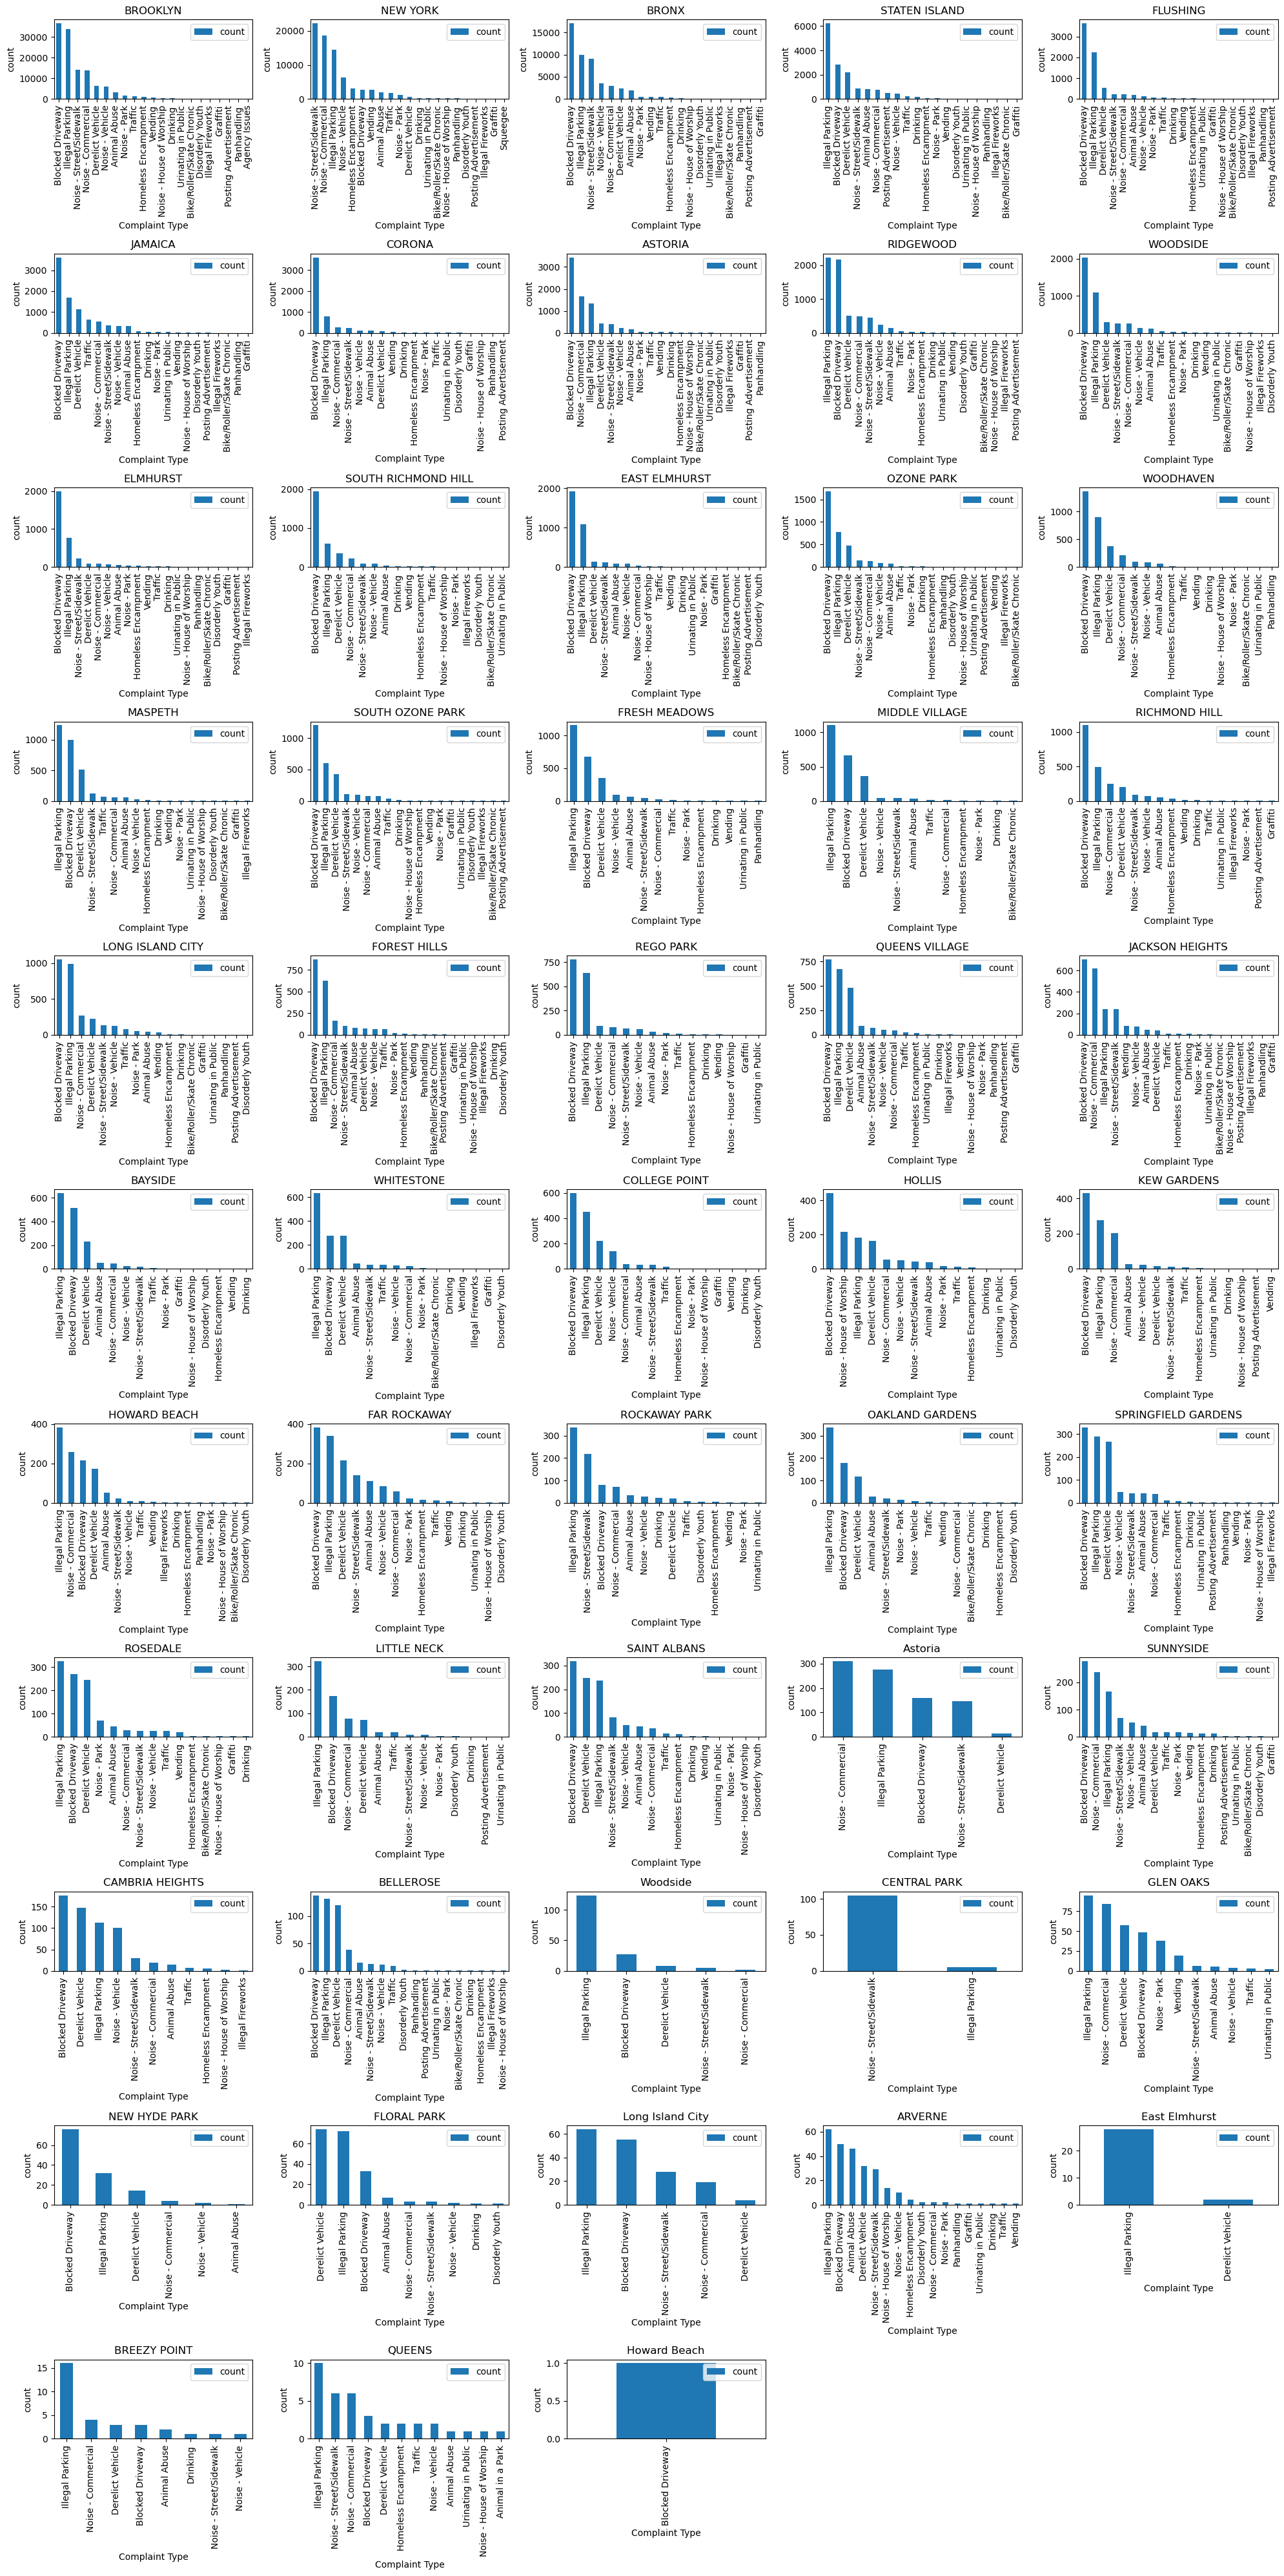

In [157]:
## Create a figure with 10 rows and 5 columns of subplots

fig, axes = plt.subplots(11, 5, figsize=(20,40))

# Flatten the axes array
axes = axes.ravel()

# Iterate over the unique cities
for i, city in enumerate(complaints_by_city['City'].unique()):
    city_complaints = complaints_by_city[complaints_by_city['City'] == city]
    # Add a subplot to the figure
    ax = axes[i]
    # Create a bar chart on the subplot
    city_complaints.plot(x='Complaint Type', y='count', kind='bar', ax=ax)
    ax.set_title(city)
    ax.set_xlabel('Complaint Type')
    ax.set_ylabel('count')

    # Hide the extra subplots
for i in range(len(complaints_by_city['City'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 5. Check if the average response time across various types of complaints

In [159]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [160]:
df['Response Time'] = df['Closed Date']-df['Created Date']
response_time = df.groupby(['Complaint Type'])['Response Time'].mean().sort_values(ascending=False)
print(response_time)

Complaint Type
Animal in a Park                     14 days 00:50:34
Derelict Vehicle            0 days 07:02:40.894961888
Graffiti                    0 days 06:27:56.343949044
Agency Issues                  0 days 05:04:49.125000
Animal Abuse                0 days 05:00:32.556030389
Blocked Driveway            0 days 04:30:32.538998986
Panhandling                 0 days 04:24:13.550769230
Illegal Parking             0 days 04:20:49.946055285
Homeless Encampment         0 days 04:17:36.534754972
Squeegee                       0 days 04:02:40.250000
Vending                     0 days 03:59:27.194597179
Drinking                    0 days 03:50:21.300569800
Bike/Roller/Skate Chronic   0 days 03:38:43.688421052
Urinating in Public         0 days 03:35:59.293291731
Noise - Vehicle             0 days 03:29:21.832487046
Disorderly Youth            0 days 03:26:03.749206349
Traffic                     0 days 03:25:13.238205276
Noise - Street/Sidewalk     0 days 03:23:51.853552639
Noise - Park 